# **NEUTRAL NETWORK INITIALIZATION FROM SCRATCH STUDY BY BETTY, FANDRESENA AND VICENT**

In [67]:
import numpy as np
import pandas as pd
import os
import math
np.random.seed(42)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

## **1.ABSTRACT**

This study explores how the use of different initialization schemes affect the convergence and performance  of a neural network model during training. For the study, xavier , random and constant initialization methods will be explored. Constant  weights initialization methods are  used to illustrate the exploding gradient descent, while random initialization methods are compared to xavier initialization illustrating the rapid convergence. The evolution of the variance of the weights of each layer during the learning algorithm will then be visualized to reflect the effects of initialization on a neural network learning process.

## **2.INTRODUCTION**

This is an introductory analysis of how parameter initialization in neural networks works. This is important because random initialization when training the same model multiple times may not produce the same results. Different approaches have been developed to address this issue. Among the popular ones are those analyzed in this study.

## **3.READ THE DATA**


The data used in this study is a simple binary classification dataset with two features (x1,x2 and a single targel lable y).

In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
data_path1= 'gdrive/MyDrive/intro_ml/data/'
data_file1='ml_t5_data_train.csv'

data_path2 = 'gdrive/MyDrive/intro_ml/data/'
data_file2='ml_t5_data_test.csv'


In [70]:
df_train = pd.read_csv(data_path1+data_file1)
df_train.head()


df_test = pd.read_csv(data_path2+data_file2)
df_test.head()


,x1,x2,class
0,3.967433,5.580323,1
1,-5.324361,-4.574185,1
2,5.635016,3.301594,1
3,2.369043,-2.431812,0
4,3.607040,-3.598197,0


In [71]:
inputs = ['x1', 'x2']
clss='class'
X_train = df_train[inputs].to_numpy()
y_train = df_train[clss].to_numpy()

X_test = df_test[inputs].to_numpy()
y_test = df_test[clss].to_numpy()

sig=df_train[df_train[clss]==1]
bkg=df_train[df_train[clss]==0]

## **4.INITIALIZATION METHOD**S

### **4.1 Constant Initialization**

All the weights are initialized  with a constant value. Hence initial weights are constant in all layers.

In [72]:
def constant_initialization(layer):
      constant=1
      #initializing the weights
      layer.weights=np.full((layer.fan_in,layer.fan_out),constant)
      #initializing the bias

      layer.bias=np.full((layer.fan_out,1),constant)
      #print(f"layer depth: {layer.depth} , bias: {layer.bias.shape}")
      #print(f"layer_depth:{layer.depth}",layer.fan_in, layer.fan_out)

### **4.2 Xavier Initialization**

Here weights are obtained from random distribution with range [-x,x].

In [73]:
def xavier_uniform_initialization(layer):
        limit = np.sqrt(6 / (layer.fan_in+ layer.fan_out))

        layer.weights=np.random.uniform(-limit, limit, size=(layer.fan_in, layer.fan_out))

        layer.bias=np.full((layer.fan_out,1),0)



In [74]:
def xavier_normal_initialization(layer):
        limit = np.sqrt(2 / (layer.fan_in+ layer.fan_out))

        layer.weights=np.random.normal(0, limit, size=(layer.fan_in, layer.fan_out))

        layer.bias=np.full((layer.fan_out,1),0)

### **4.3 Random Initialization**

In [75]:
def random_initialization(layer):
     #initializing the weights
      layer.weights=np.random.random(( layer.fan_in , layer.fan_out ))
      #initializing the bias

      layer.bias= np.random.random(( layer.fan_out, 1 ))

## **5. Neural Network**

This section introduces the core components used to build and train a basic neural network, including activation functions, cost functions, and the overall network architecture.

### **5.1 Linear functions**

Linear functions form the foundation of neural networks by combining inputs, weights, and biases to produce intermediate representations before applying non-linear transformations.

#### **5.1.1 Sigmoid function**

In [76]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

In [77]:
def sigmoid_derivative(z):
    sig_value = sigmoid(z)
    return sig_value*(1-sig_value)

#### **4.1.2 Tanh function**

In [78]:
def tanh(z):

    ez=np.exp(z)
    ez_=np.exp(-z)

    output=(ez-ez_)/(ez+ez_)
    return output

In [79]:
def tanh_derivative(z):

    tanh_value = tanh(z)
    return 1 - (tanh_value**2)

#### **5.1.3 Computing weight sum**

The weighted sum computes the linear combination of inputs and weights, including a bias term, which serves as the input to the activation function in each neuron.

In [80]:
def weighted_sum(weights, inputs, bias):

    return (weights.T@inputs) + bias


#### **5.1.3 Cross Entropy Cost**

The cross-entropy cost function measures the difference between predicted probabilities and true labels, and is widely used for classification tasks.

In [81]:
def cross_entropy_cost(y_pred, y_true):
    m=len(y_true)
    y_pred_clipped=np.clip(y_pred,1e-15,1-1e-15)
    log_1 = np.log(y_pred_clipped)
    log_2= np.log(1-y_pred_clipped)

    #print(log_2.shape, y_true.shape,y_pred.shape)
    #print(log_1.shape,y_true.shape)
    return (-y_true*log_1+(y_true-1)*log_2).mean()

#### **5.1.4 Cross Entroy Gradient**


The gradient of the cross-entropy cost quantifies how the loss changes with respect to the predictions and is used during backpropagation to update model parameters.

In [82]:
def cross_entropy_gradient(y_pred, y_true):
    y_pred_clipped=np.clip(y_pred,1e-15,1-1e-15)
    term_1 = -y_true/y_pred_clipped
    term_2 = (1-y_true)/(1-y_pred_clipped)
    return term_1 + term_2

#### **5.1.5 Plotting functions**

These functions are used to visualize model behavior, including decision boundaries, cost evolution, parameter variance, and gradient dynamics during training.

In [83]:
FONTSIZE = 16
params = {
         'figure.figsize' : (6,6),
         'axes.labelsize' : FONTSIZE,
         'axes.titlesize' : FONTSIZE+2,
         'legend.fontsize': FONTSIZE,
         'xtick.labelsize': FONTSIZE,
         'ytick.labelsize': FONTSIZE,
         'xtick.color'    : 'black',
         'ytick.color'    : 'black',
         'axes.facecolor' : 'white',
         'axes.edgecolor' : 'black',
         'axes.titlepad'  :  20,
         'axes.labelpad'  :  10}
plt.rcParams.update(params)

XNAME = 'x1'; XLABEL = r'$x_1$'
YNAME = 'x2'; YLABEL = r'$x_2$'
RANGE = (-6, 6); STEP = 0.1
def get_decision_surface(model, boundary=0.5, range=RANGE, step=STEP):

    # Create a grid of points spanning the parameter space:
    x1v, x2v = np.meshgrid(np.arange(range[0], range[1]+step, step),
                            np.arange(range[0], range[1]+step, step))

    # Stack it so that it is shaped like X_train: (m,2)
    X_grid = np.c_[x1v.ravel(), x2v.ravel()].reshape(-1,2)

    # Feedforward on all grid points and get binary predictions:

    Ypred_grid = model.predict(X_grid)

    return (x1v, x2v, Ypred_grid.reshape(x1v.shape))

In [84]:
def plot_scatter(sig, bkg,method, ds=None , xname=XNAME, xlabel=XLABEL, yname=YNAME, ylabel=YLABEL, range=RANGE, step=STEP, title="Scatter plot"):

  fig, ax = plt.subplots()

  # Decision surface
  if ds:
    (xx, yy, Z) = ds # unpack contour data
    cs = plt.contourf(xx, yy, Z, levels=[0,0.5,1], colors=['orange','dodgerblue'], alpha=0.3)

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=10, c='dodgerblue', alpha=1, label='Positive class')
  ax.scatter(bkg[xname], bkg[yname], marker='o', s=10, c='orange',     alpha=1, label='Negative class')

  # Axes, legend and plot:
  ax.set_xlim(range); ax.set_xlabel(xlabel)
  ax.set_ylim(range); ax.set_ylabel(ylabel)

  ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
  ax.set_title(title+f"({method})")
  plt.show()

def plot_cost_vs_iter(train_costs, test_costs, title="Cost evolution"):

    fig, ax = plt.subplots(figsize=(10, 5))
    iters = np.arange(1,len(train_costs)+1)
    ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
    ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')
    ax.set_xlabel("Number of iterations"); ax.set_xlim(1, iters[-1])
    ax.set_ylabel("Cost")
    ax.legend(loc="upper right", frameon=False)
    ax.set_title(title)
    plt.show()

In [85]:

def plot_var_vs_iter(data,max_iter, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = cm.get_cmap("tab10", len(data))
    for layer in data:
        df=data[layer]
        ax.plot(df['iter'], df['weights'], color=colors(layer-1), lw=1, label=f'Variance Layer {layer}')
    ax.set_xlabel("Number of iterations"); ax.set_xlim(1, max_iter)
    ax.set_ylabel("Variance")
    ax.legend(loc="upper right", frameon=False)
    ax.set_title(f"Variance evolution ({title})")
    plt.show()

def plot_grad_vs_iter(data,max_iter, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = cm.get_cmap("tab10", len(data))
    for layer in data:
        df=data[layer]
        ax.plot(df['iter'], df['gradW'], color=colors(layer-1), lw=1, label=f'Gradient Layer {layer}')
    ax.set_xlabel("Number of iterations"); ax.set_xlim(1, max_iter)
    ax.set_ylabel("Gradient")
    ax.legend(loc="upper right", frameon=False)
    ax.set_title(f"Average Node Gradient evolution ({title})")
    plt.show()

In [98]:
def plot_violin_costs(xavier_train, xavier_test,
                      norm_train, norm_test,
                      random_train, random_test,
                      dataset="train",title=""):
    """
    Make violin plots comparing initialization methods.

    dataset: "train" or "test" (which costs to plot)
    """

    if dataset == "train":
        data = {
             "Random Init": random_train,
            "Xavier Init": xavier_train,
            "Normal Xavier Init": norm_train

        }
        title = f"Training Costs by Initialization Method ({title}))"
    elif dataset == "test":
        data = {
             "Random Init": random_test,
            "Xavier Init": xavier_test,
            "Normal Xavier Init": norm_test

        }
        title = f"Testing Costs by Initialization Method ({title})"
    else:
        raise ValueError("dataset must be 'train' or 'test'")

    # Prepare data for seaborn
    all_costs = []
    all_labels = []
    for label, values in data.items():
        all_costs.extend(values)
        all_labels.extend([label]*len(values))

    plt.figure(figsize=(8,6))
    sns.violinplot(x=all_labels, y=all_costs, hue=all_labels,  inner="box", palette="Set2")
    plt.title(title)
    plt.ylabel("Final Cost")
    plt.xlabel("Initialization Method")
    plt.show()



### **5.2 Neural Network Layers**

This section defines the structure and behavior of individual neural network layers, including parameter initialization, forward propagation, and gradient storage.

In [87]:
#This is our neural network layer class
class Layer:
   def __init__(self,model,depth,fan_in,fan_out, init_method,is_output=False):
        #layer properties
        self.init_method=init_method
        self.depth=depth
        self.fan_in=fan_in
        self.model=model
        self.fan_out=fan_out

        #terms to be initilized
        self.bias=np.array([])
        self.weights=np.array([])
        #computed gradients for the layer
        self.gradient=np.array([])
        #computed outputs for the layer
        self.output=np.array([])
        self.is_output=is_output

        # caches for forward/backward
        self.input_cache = None
        self.z_cache = None
        self.output = None
        #storing the errors
        self.dW=None
        self.dB=None
        self.test_output=None
        self.test_z_cache=None

        self.initialize()
   def initialize(self):
         methods={
             'constant-init':constant_initialization,#for constant initialization
             'xavier-uniform-init':xavier_uniform_initialization, #for xavier initialization
             'xavier-normal-init':xavier_normal_initialization, #for xavier initialization
             'random-init':random_initialization,#for random initialization
         }
         #selection of initialization function
         selected_method=methods[self.init_method]
         #initialization of the layer weights and baises
         return selected_method(self)
   def forward_propagation(self,input_values,train=True):
         #storing inputs for backpropagation

         #input for activation function
         self.input_cache=input_values
         #computing z value
         #print(f"layer{self.depth}","weights",self.weights,"bias",self.bias,"input",input_values,"input_shape",input_values.shape)
         z_value=weighted_sum(self.weights,input_values,self.bias)

         #print("z_values",z_value)
         #computing layer using activation function
         if(train==True):
             self.z_cache = z_value
             self.output=self.model.activation_function(z_value,self.is_output)
             return self.output
         else:
             self.test_z_cache=z_value
             self.test_output=self.model.activation_function(z_value,self.is_output)

             return self.test_output



#This is our neural network layer class
class InputLayer(Layer):
   def __init__(self,model,depth,fan_in,fan_out, init_method,data):
        #layer properties
        self.init_method=init_method
        self.depth=depth
        self.fan_in=fan_in
        self.model=model
        self.fan_out=fan_out

        #terms to be initilized
        self.bais=np.array([])
        self.weights=np.array([])
        #computed gradients for the layer
        self.gradient=np.array([])
        #computed outputs for the layer
        self.output=np.array([])

        # caches for forward/backward
        self.input_cache = None
        self.z_cache = None
        self.input_values=data


        self.output = data
        self.test_output=None
        self.test_z_cache=None

        self.initialize()


### **5.3 Neural Network Class**

This section presents the complete neural network model, integrating layers, training procedures, forward and backward propagation, performance evaluation, and visualization tools.

In [97]:
#This is our neural network class for generating test models
class BasicNeuralNetwork:
      def __init__(self,train_features, train_targets, test_features, test_targets,hidden_layers=[2,2],init_method='constant-init',
                   activation_method='tanh',output_activation_method='sigmoid',epochs=200,epsilon=0.0001,learning_rate=0.1):
            #model settings and hyperparameters
            self.init_method=init_method
            self.activation_method=activation_method
            self.output_activation_method=output_activation_method
            self.learning_rate=learning_rate
            self.epochs=epochs
            self.epsilon=epsilon
            self.print_interval=100
            #training data
            self.features=train_features
            self.num_features=train_features.shape[1]
            self.test_features=test_features

            self.train_targets=np.reshape(train_targets,(-1,1,1))
            self.test_targets=np.reshape(test_targets,(-1,1,1))
            self.num_targets=train_targets.shape[0]
            self.output_nodes=1
            #layer data
            self.num_layers=len(hidden_layers)+2
            self.num_hidden_layers=len(hidden_layers)
            self.hidden_layers=hidden_layers
            self.layers={
                0:InputLayer(self,0,0,hidden_layers[0],self.init_method,self.features.copy()),
                (self.num_hidden_layers+1):Layer(self,self.num_layers-1,hidden_layers[self.num_hidden_layers-1],self.output_nodes,self.init_method,is_output=True)
            }
            #performance history
            self.test_cost=[]
            self.train_cost=[]
            self.debug=False
            #initialization of layers
            self.init_layers()

            self.variance={}
      #this function initializes the model layers(creates the model layers)
      def init_layers(self):
           fan_in=self.num_features
           depth=1

           for fan_out in self.hidden_layers:
                 #creating a n new layer
                 layer=Layer(self,depth,fan_in,fan_out,self.init_method)
                 #print("depth",layer.depth)

                 if(depth not in self.layers):
                      #storing the layer onto the model

                      self.layers[depth]=layer
                 else:
                     #throw error if layer is already assigned
                     raise ValueError("Wrong Layer Assignment!")
                 fan_in=fan_out
                 depth+=1

           return self.layers
      def activation_function(self,z,is_output=False):
           methods={
                'sigmoid':sigmoid,
                'tanh':tanh
           }
           #selection of activation function

           if(is_output==True):
              selected_method=methods[self.output_activation_method]
           else:
               selected_method=methods[self.activation_method]
           return selected_method(z)
      def activation_derivative(self,z,is_output=False):
           methods={
                'sigmoid':sigmoid_derivative,
                'tanh':tanh_derivative
           }

           #selection of activation function
           if(is_output==True):
              selected_method=methods[self.output_activation_method]
           else:
               selected_method=methods[self.activation_method]
           return selected_method(z)

      def forward_propagation(self,features,is_not_test=False):
             depth=1
             layers=self.layers

             m=len(features)

             x_inputs=features.reshape((m,-1,1))
             output=None

             test_check=True
             if(is_not_test==True):
                 test_check=False

             #forward propagation loop
             while(depth<(self.num_layers)):
                   #accessing a layer a target depth, 0 for input layer, ....
                   layer = layers[depth]
                   if(depth==1):

                           layer.forward_propagation(x_inputs,test_check)

                           if(test_check==True):
                               layers[0].output=x_inputs
                           else:
                                layers[0].test_output=x_inputs


                   else:
                       if(test_check==True):
                            layer.forward_propagation(layers[depth-1].output,test_check)
                       else:
                            layer.forward_propagation(layers[depth-1].test_output,test_check)


                   #getting the computed output from the layer
                   if(test_check==True):
                        output=layer.output
                   else:
                        output=layer.test_output
                   #print(f"forward layer:{layer.depth}","input_shape",layer.input_cache.shape,"output",layer.output,"output_shape",layer.output.shape)
                   depth+=1
             #returning the output after the forward propagation

             return output
      #function to update the model parameters

      def update_weights(self):
           for depth in reversed(range(1, self.num_layers)):
                  layer = self.layers[depth]
                  layer.weights=layer.weights-self.learning_rate*layer.dW
                  layer.bias=layer.bias-self.learning_rate*layer.dB

                  #print(f"layer {layer.depth} wd:{layer.weights.shape} bias {layer.bias.shape}" )
      def print_layers(self):
           st="\n"
           for depth in reversed(range(0, self.num_layers)):
                  layer=self.layers[depth]
                  st+=f"layer {layer.depth} wd:{layer.weights.shape} bias {layer.bias.shape}"
           return st
      def loss_derivative(self,y_pred,y_true):
           return cross_entropy_gradient(y_pred, y_true)
      def back_propagation(self,y_pred,y_true):
           m=self.num_targets

           max_depth=self.num_layers-1
           for depth in reversed(range(1, self.num_layers)):
                layer = self.layers[depth]

                next_layer = self.layers[layer.depth-1]
                if(layer.is_output==True):
                    layer.delta = self.loss_derivative(y_pred,y_true)*self.activation_derivative(layer.z_cache,True)

                else:
                    prev_layer = self.layers[layer.depth+1]

                    layer.delta=  self.activation_derivative(layer.z_cache)*(prev_layer.weights@prev_layer.delta)
                #print("layer:",layer.depth,"delta",layer.delta.shape)
                layer.dW =  np.mean(next_layer.output@np.transpose(layer.delta,(0,2,1)),axis=0)
                layer.dB =  np.sum(layer.delta,axis=0)/m


      def train(self):
          x_train=self.features
          y_train=self.train_targets

          y_test=self.test_targets

          x_test=self.test_features

          #lets start the forward propagation loop
          for epoch in range(1,self.epochs+1):
                 y_pred=self.forward_propagation(x_train)

                 #print("output_shape",y_pred.shape,y_pred[-1])

                 y_pred_test=self.forward_propagation(x_test,True)


                 cost_train,cost_test=0,0
                 #print("output_shape",y_pred_test.shape)

                 cost_train = cross_entropy_cost(y_pred, y_train)
                 cost_test  = cross_entropy_cost(y_pred_test,  y_test)

                 self.test_cost.append(cost_test)
                 self.train_cost.append(cost_train)



                 self.back_propagation(y_pred,y_train)


                 if ((epoch % (self.print_interval) == 0 or epoch == 1 or epoch == self.epochs) and self.debug ==True):
                           print(
            f"Iteration {epoch:>4}\t"
            f"Train cost: {cost_train:.5f}\t"
            f"Test cost: {cost_test:.5f}\t"
            f"Diff: {cost_test - cost_train:.2e}"  #+ self.print_layers()
                            )
                 self.record_parameters(epoch)
                 self.update_weights()


      def record_parameters(self,iter):
           for depth in range(1, self.num_layers):
                  layer=self.layers[depth]
                  weights=layer.weights
                  bias=layer.bias

                  var_weights=weights.var()
                  var_bias=bias.var()

                  dW=layer.dW.mean()
                  dB=layer.dB.mean()

                  record={}
                  if depth in self.variance:
                        record=self.variance[depth]
                        record["iter"].append(iter)
                        record['weights'].append(var_weights)
                        record["bias"].append(var_bias)

                        record["gradW"].append(dW)
                        record["gradB"].append(dB)

                  else:
                        self.variance[depth]=record
                        record["iter"]=[iter]
                        record['weights']=[var_weights]
                        record["bias"]=[var_bias]

                        record["gradW"]=[dW]
                        record["gradB"]=[dB]


      def get_parameters(self):
            weights=[]
            bias=[]

            for depth in range(1, self.num_layers):
                     layer=self.layers[depth]
                     weights.append({"layer":layer.depth,"weights":layer.weights})
                     weights.append({"layer":layer.depth,"weight":layer.bias})
            return weights,bias
      def plot_cost(self):

            init_method={
             'constant-init':"Constant Initialization",
             'xavier-init':"Xavier Initialization", #for xavier initialization
             'random-init':"Random Initialization",#for random initialization
            }
            title=init_method[self.init_method]
            plot_cost_vs_iter(self.train_cost,self.test_cost, title=f"Cost evolution({title})")

      def plot_variance(self):

            init_method={
             'constant-init':"Constant Initialization",
             'xavier-init':"Xavier Initialization", #for xavier initialization
             'random-init':"Random Initialization",#for random initialization
            }
            title=init_method[self.init_method]
            plot_var_vs_iter(self.variance,self.epochs,title)

      def plot_scatter(self,sig,bkg):
            decision_surface=get_decision_surface(self)
            init_method={
             'constant-init':"Constant Initialization",
             'xavier-init':"Xavier Initialization", #for xavier initialization
             'random-init':"Random Initialization",#for random initialization
            }
            title=init_method[self.init_method]
            plot_scatter(sig,bkg,title,decision_surface)
      def metrics(self):
                """

                Parameters :
                ----------
                X
                Returns
                -------
                tuples(accuracy, precision, recall )
                """
                x_test=self.test_features
                y_test=self.test_targets

                pred = self.predict(x_test) # converted to 0 and 1
                TP = np.sum((y_test==1)&(pred==1))
                TN = np.sum((y_test==0)&(pred==0))
                FP = np.sum((y_test==0)&(pred==1))
                FN = np.sum((y_test==1)&(pred==0))



                accuracy = (TP + TN)/(TP + TN + FP + FN) # True predition over all predictions
                precision = (TP)/(TP +FP ) # True positive over all positive predictions
                recall  = (TP)/(TP + FN ) # Measures the fraction of true predictions among all true observations #this is tpr also
                tnr = (TN)/(TN+FP)
                f1 = 2*(recall*precision)/(recall+precision)
                print(f"""
                                    ================================
                                    | Accuracy || Precision || Recall|
                                    =================================
                                    |  {accuracy:0.3f}   ||  {precision:0.3f}    ||  {recall:0.3f}|
                                    ==================================""")
                return (accuracy, precision, recall, tnr )
      def roc_curve(self):
            # y_pred_raw id the output of the last sigmoid
            y_true=self.test_targets
            x_test=self.test_features
            y_pred_raw=self.predict(x_test)

            fpr, tpr, thresholds = roc_curve(y_true, y_pred_raw)
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(8,6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC)')
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()
      def plot_gradient(self):
            init_method={
             'constant-init':"Constant Initialization",
             'xavier-init':"Xavier Initialization", #for xavier initialization
             'random-init':"Random Initialization",#for random initialization
            }
            title=init_method[self.init_method]
            plot_grad_vs_iter(self.variance,self.epochs,title)

      def output_prediction(self,output_node, boundary_value):
                  output_node = output_node.reshape(-1, 1, 1)
                  predictions = (output_node > boundary_value).astype(int)
                  return predictions
      def predict(self,test_features):
          #using the feed forward propagation to make a prediction with
          #optimization weights in the system.
          output = self.forward_propagation(test_features)

          return self.output_prediction(output,0.5)





### **5.4 Models**

#### **5.4.1 Architecture 2 With [3,2] Layers**

##### **5.4.1.1 Xavier Initialization Model**

In [89]:
xavier_costs_train=[]
xavier_costs_test=[]
for i in range(100):
  new_model_xavier=BasicNeuralNetwork(X_train,y_train,X_test,y_test,[3,2],
                                      init_method="xavier-uniform-init",epochs=600,learning_rate=0.5)
  new_model_xavier.train()
  xavier_costs_train.append(float(new_model_xavier.train_cost[-1]))
  xavier_costs_test.append(float(new_model_xavier.test_cost[-1]))


##### **5.4.1.2 Xavier Normal Initialization**

In [90]:
norm_init_costs_train=[]
norm_init_costs_test=[]
for i in range(100):
  new_model_norm=BasicNeuralNetwork(X_train,y_train,X_test,y_test,[3,2],init_method="xavier-normal-init",epochs=600,learning_rate=0.5)
  new_model_norm.train()
  norm_init_costs_train.append(float(new_model_norm.train_cost[-1]))
  norm_init_costs_test.append(float(new_model_norm.test_cost[-1]))


##### **5.4.1.3 Random Initialization Model**

In [91]:
random_costs_train=[]
random_costs_test=[]
for i in range(100):
  new_model_random=BasicNeuralNetwork(X_train,y_train,X_test,y_test,[3,2],init_method="random-init",epochs=600,learning_rate=0.5)
  new_model_random.train()
  random_costs_train.append(float(new_model_random.train_cost[-1]))
  random_costs_test.append(float(new_model_random.test_cost[-1]))

print("training:",random_costs_train)
print("testing:",random_costs_test)


training: [0.012859678253866516, 0.3585379953110329, 0.015899166509594057, 0.014060263001908546, 0.35012338076984983, 0.032584386500881295, 0.3594586769563789, 0.017487497677053127, 0.35771779293217937, 0.012367524551796013, 0.35855666961476357, 0.48269280765087075, 0.012461667125363776, 0.34839347564407747, 0.013012212646565402, 0.012303261711004617, 0.3568219134164157, 0.014292614723335257, 0.3496177054284823, 0.01259774993771121, 0.01243302095823524, 0.4841013403177369, 0.3491820569539594, 0.013735122912418615, 0.012848623132645143, 0.3576346564897265, 0.34813614791344777, 0.012458361914416273, 0.48032087538383406, 0.014190604238567328, 0.012561703551312647, 0.48007392460005976, 0.014116212143574863, 0.016511382543864146, 0.4815315588963404, 0.3491346172710963, 0.3485879985195419, 0.48257294723371996, 0.357395798847005, 0.3573675678083629, 0.34834949452161457, 0.47982378871335635, 0.013724283327632796, 0.4818999362063801, 0.013361514464701857, 0.20595901321999258, 0.0142109597034284

#### **5.4.2 Architecture 2 with [8,4,1] Layers**

##### **5.4.2.1 Xavier Initialization Model**

In [92]:
xavier_costs_train2=[]
xavier_costs_test2=[]
for i in range(100):
  new_model_xavier2=BasicNeuralNetwork(X_train,y_train,X_test,y_test,[8,4,2],init_method="xavier-uniform-init",epochs=600,learning_rate=0.5)
  new_model_xavier2.train()
  xavier_costs_train2.append(float(new_model_xavier2.train_cost[-1]))
  xavier_costs_test2.append(float(new_model_xavier2.test_cost[-1]))


##### **5.4.2.2 Xavier Normal Initialization**

In [93]:
norm_init_costs_train2=[]
norm_init_costs_test2=[]
for i in range(100):
  new_model_norm2=BasicNeuralNetwork(X_train,y_train,X_test,y_test,[8,4,2],init_method="xavier-normal-init",epochs=600,learning_rate=0.5)
  new_model_norm2.train()
  norm_init_costs_train2.append(float(new_model_norm2.train_cost[-1]))
  norm_init_costs_test2.append(float(new_model_norm2.test_cost[-1]))

##### **5.4.2.3 Random Initialization Model**

In [94]:
random_costs_train2=[]
random_costs_test2=[]
for i in range(100):
  new_model_random2=BasicNeuralNetwork(X_train,y_train,X_test,y_test,[8,4,2],init_method="random-init",epochs=600,learning_rate=0.5)
  new_model_random2.train()
  random_costs_train2.append(float(new_model_random2.train_cost[-1]))
  random_costs_test2.append(float(new_model_random2.test_cost[-1]))


### **5.5 Results**

#### **5.5.1 Plotting Violin Graph With [3,2] Layers**

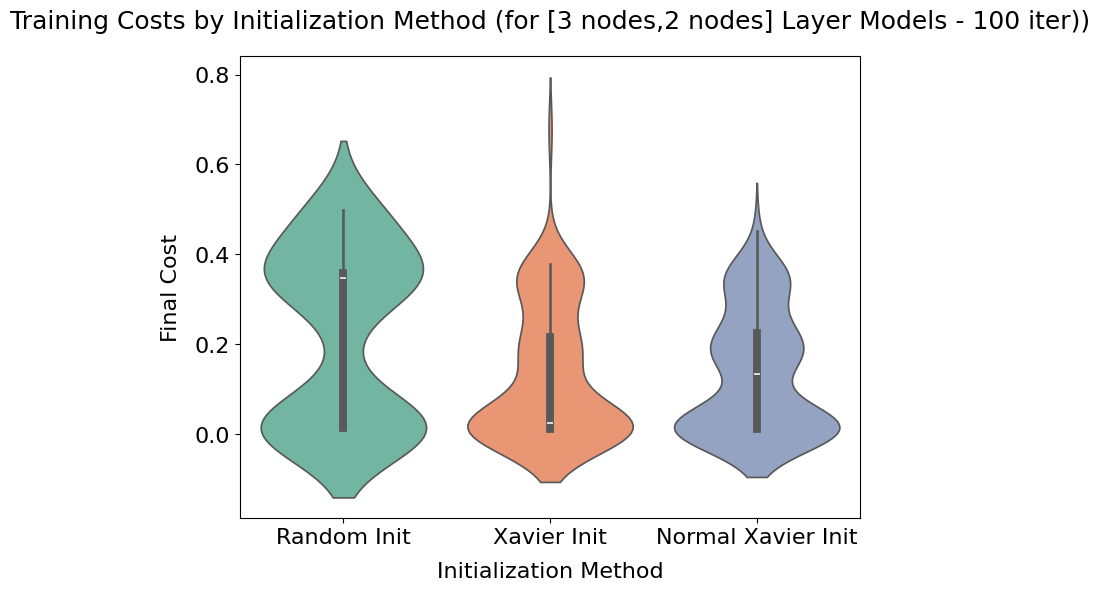

In [99]:
plot_violin_costs(xavier_costs_train, xavier_costs_test,
                     norm_init_costs_train, norm_init_costs_test,
                      random_costs_train, random_costs_test,
                      dataset="train",title="for [3 nodes,2 nodes] Layer Models - 100 iter")

The results show that the choice of initialization method has a clear impact on both the convergence behavior and stability of the neural network during training. Random initialization leads to the most variable outcomes, with a wide spread of final costs, indicating inconsistent convergence across runs. In contrast, Xavier-based initialization methods produce more stable and reliable results. Among them, standard Xavier initialization achieves the lowest median final cost, while normal Xavier initialization provides a good balance between low cost and reduced variability. Overall, these findings confirm that principled initialization schemes improve training stability and convergence compared to purely random initialization, even for relatively small network architectures.

#### **5.5.2 Plotting Violin Graph with [8,4,1] Layers**

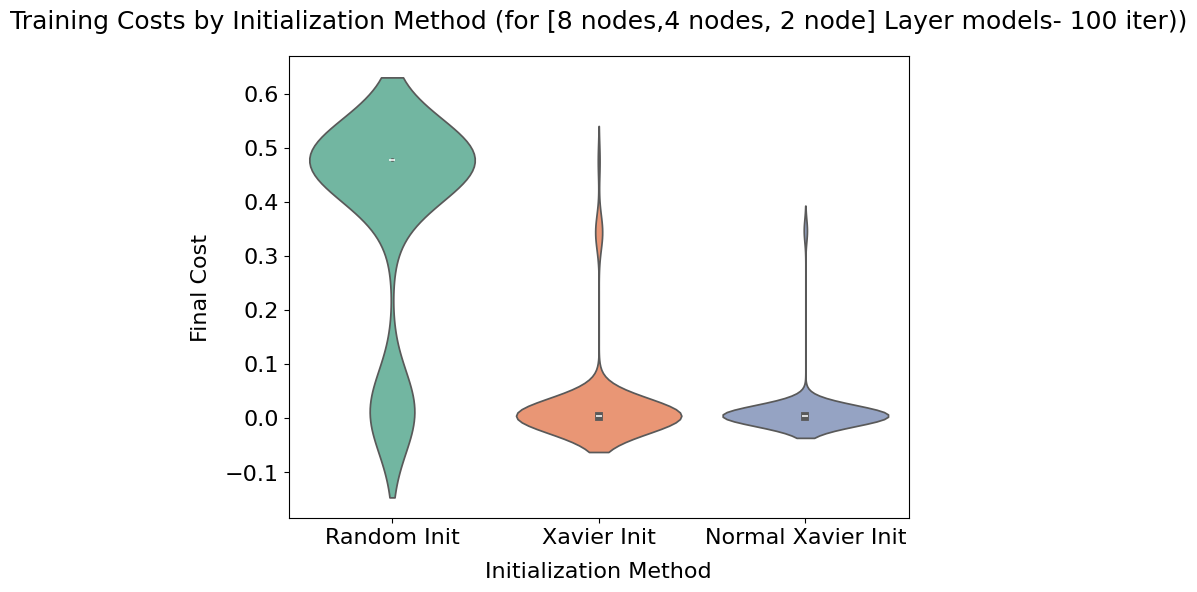

In [100]:
plot_violin_costs(xavier_costs_train2, xavier_costs_test2,
                     norm_init_costs_train2, norm_init_costs_test2,
                      random_costs_train2, random_costs_test2,
                      dataset="train",title="for [8 nodes,4 nodes, 2 node] Layer models- 100 iter")

When the network architecture is increased to [8, 4, 2] hidden layers, the impact of the initialization method becomes even more pronounced. Random initialization shows poor and highly unstable convergence, with most runs ending at high final costs and a wide spread, indicating difficulty in training deeper models reliably. In contrast, both Xavier and normal Xavier initialization concentrate strongly around very low final costs, demonstrating faster and more stable convergence. The reduced variance for Xavier-based methods suggests that they scale significantly better with increased depth. Overall, these results highlight that as network depth increases, carefully designed initialization schemes become essential, while random initialization increasingly leads to suboptimal and inconsistent training outcomes.